In [32]:
import pickle
import pandas as pd
import clustering_algorithms
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
with open('final.pkl', 'rb') as f:
    df = pickle.load(f)

# Dimensionality 25

In [23]:
(one, two)= clustering_algorithms.making_vectorizers(df.review, 25)

In [24]:
one.fit(df['review'])

In [25]:
one.kmeans(10)

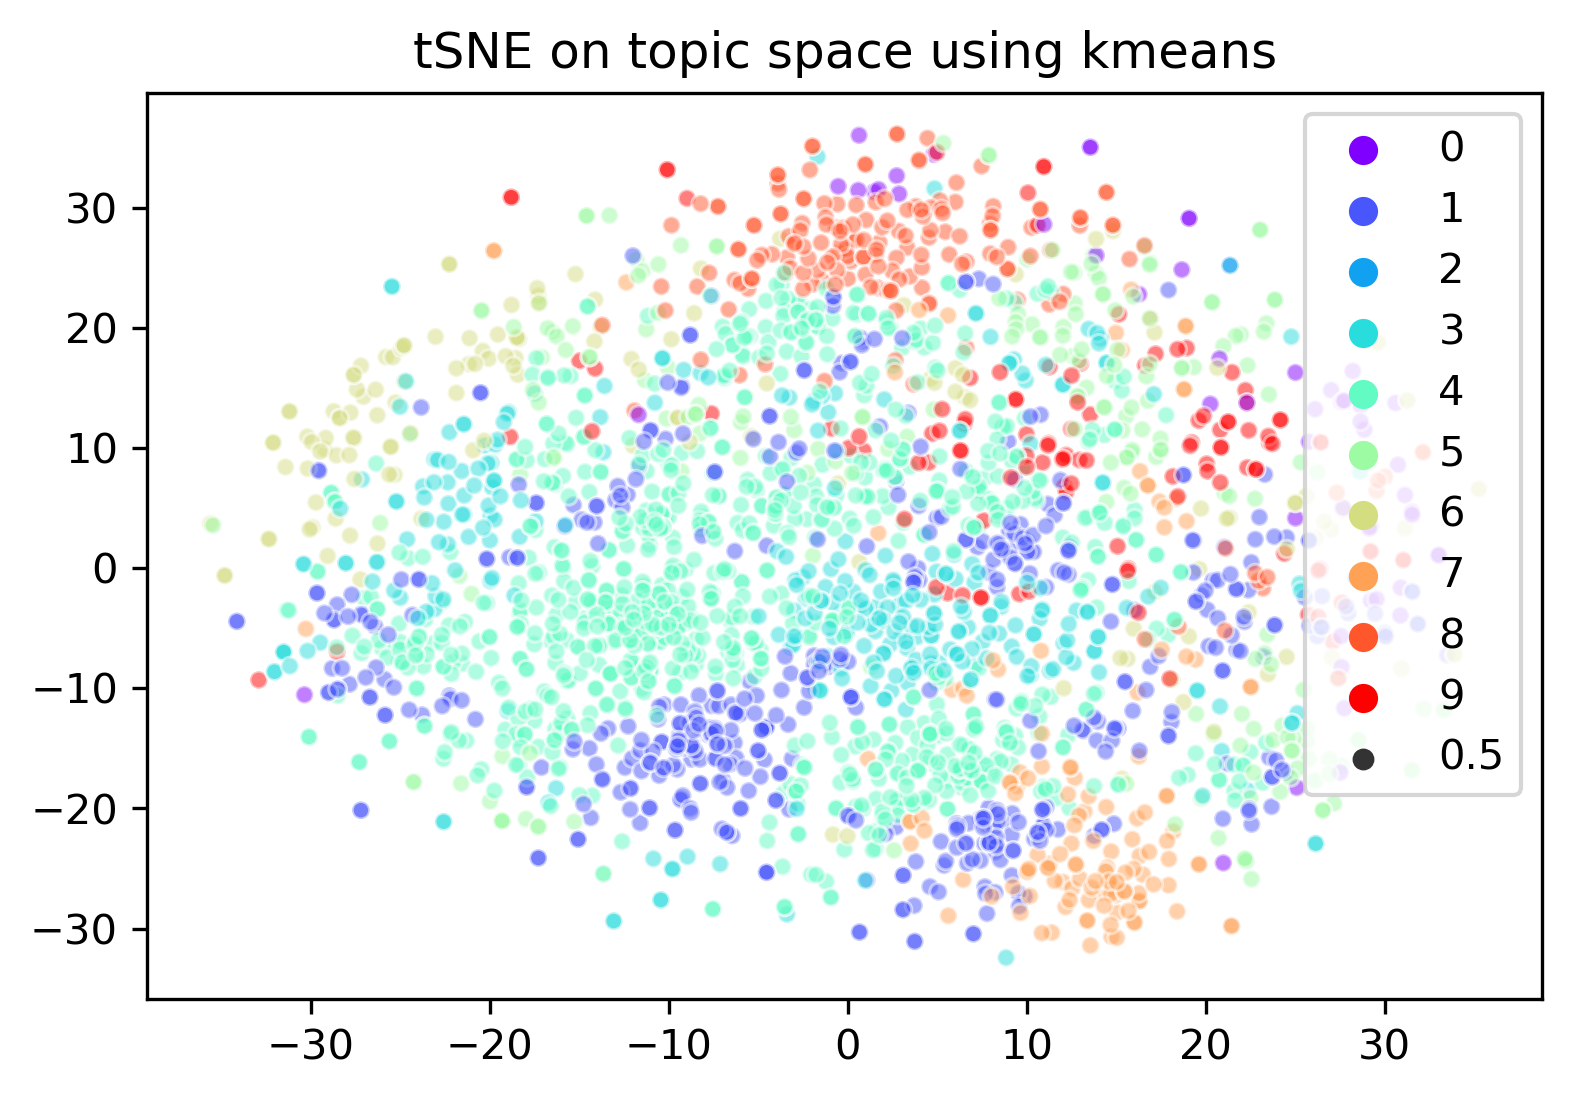

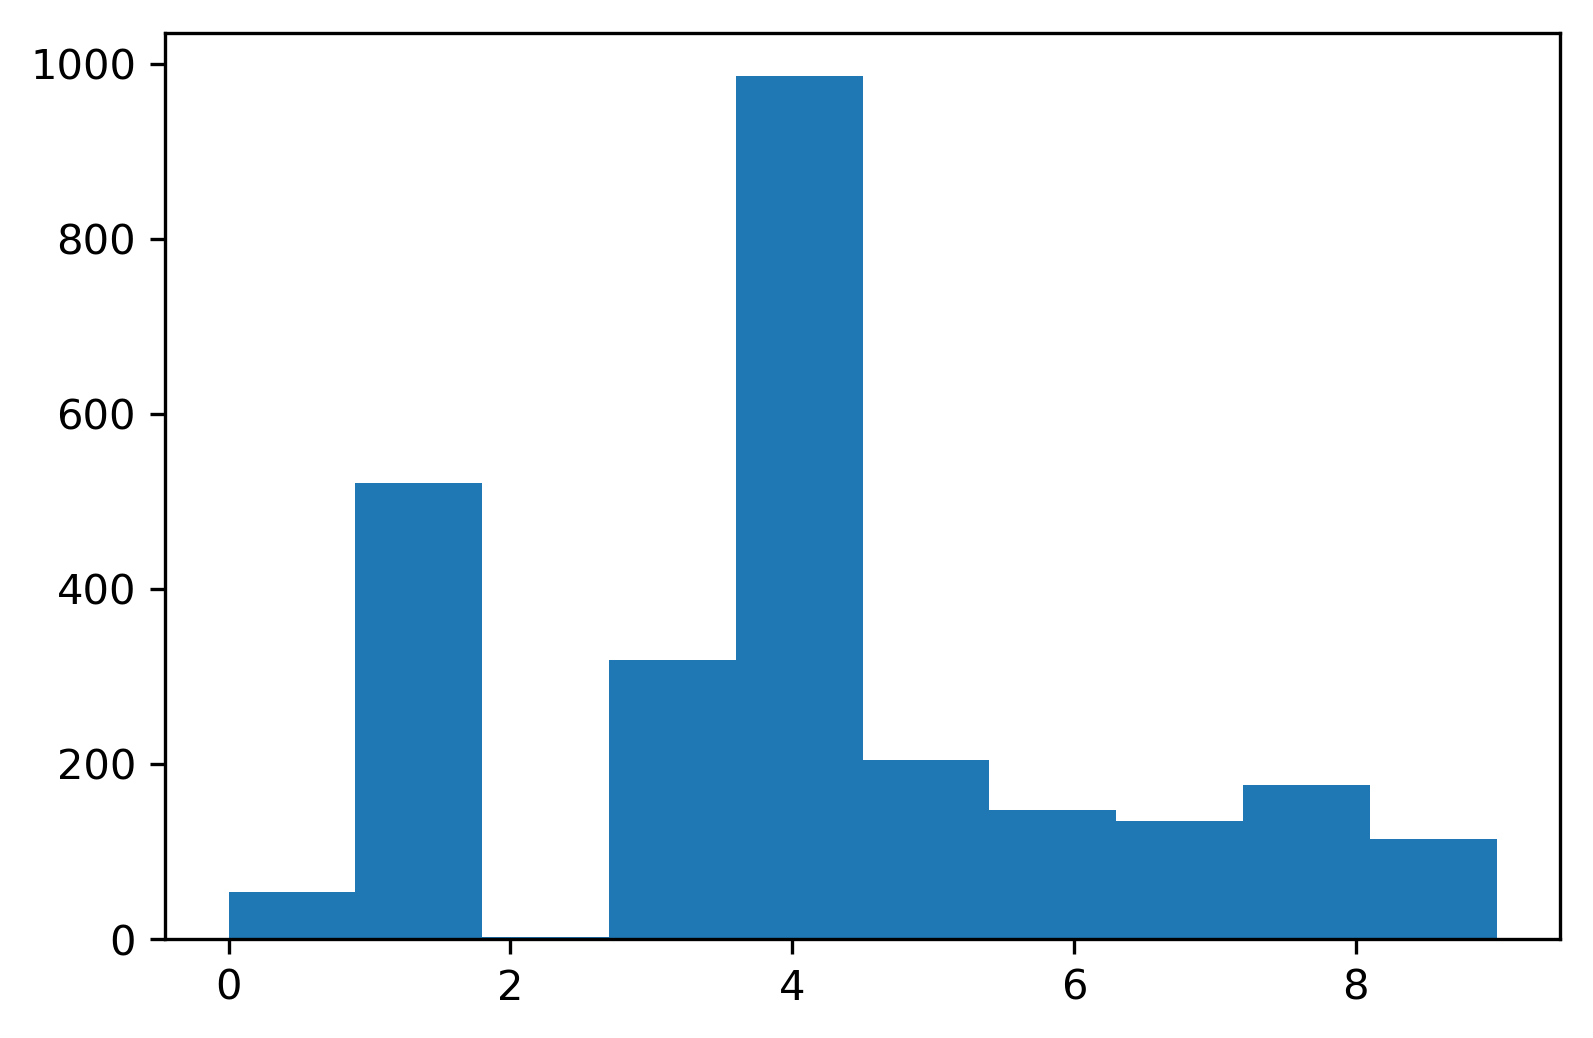

In [26]:
one.tsne(2, 100)

# Dim 50

In [44]:
(three, four)= clustering_algorithms.making_vectorizers(df.review, 50)

In [45]:
three.fit(df['review'])

In [46]:
three.kmeans(10)

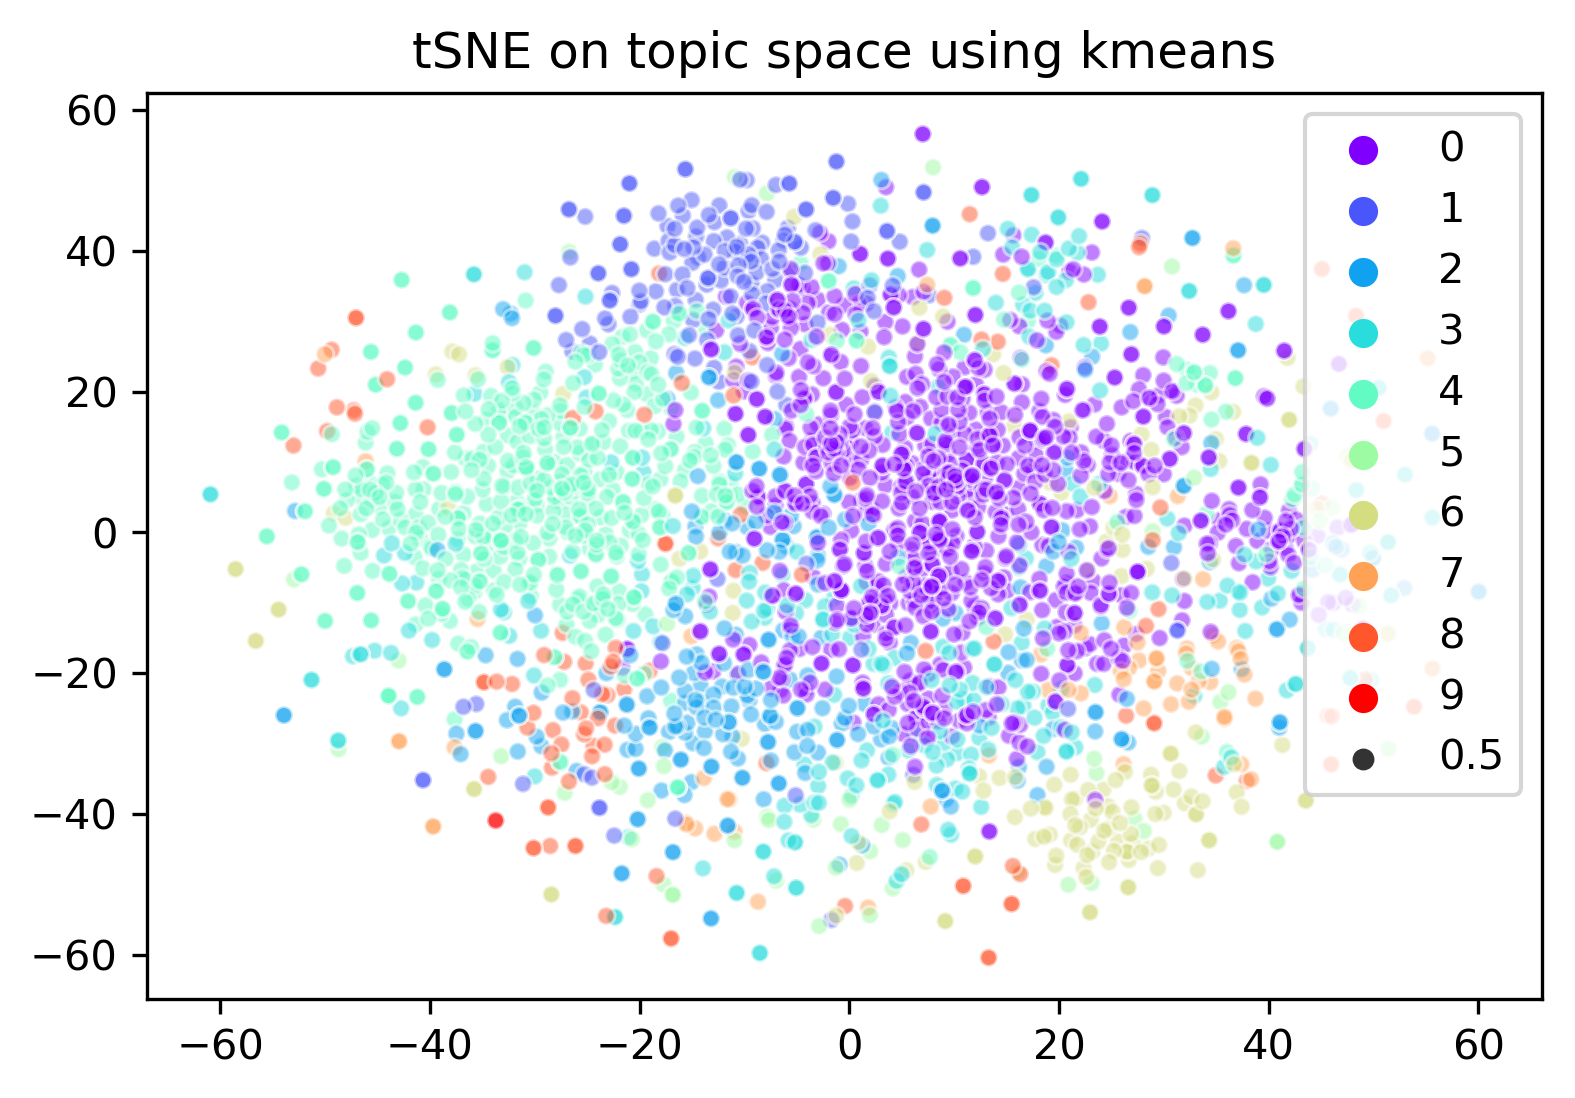

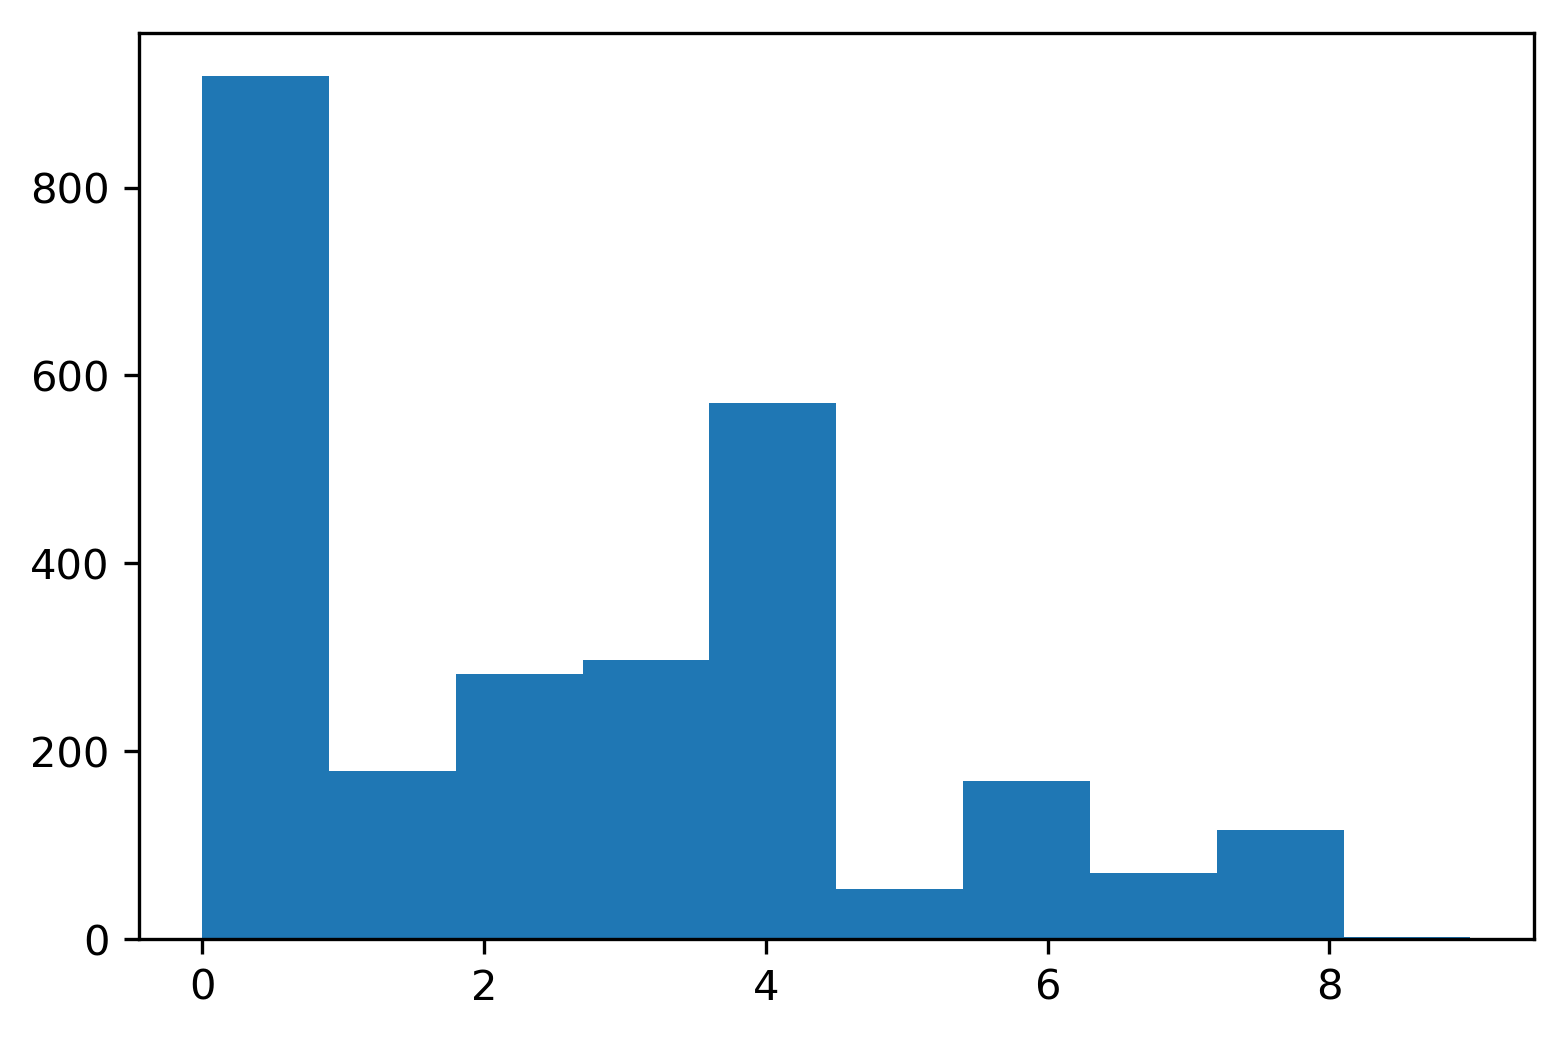

In [47]:
three.tsne(2, 50)

# Dim 75

In [50]:
(five, six)= clustering_algorithms.making_vectorizers(df.review, 75)

In [51]:
five.fit(df['review'])

In [52]:
five.kmeans(10)

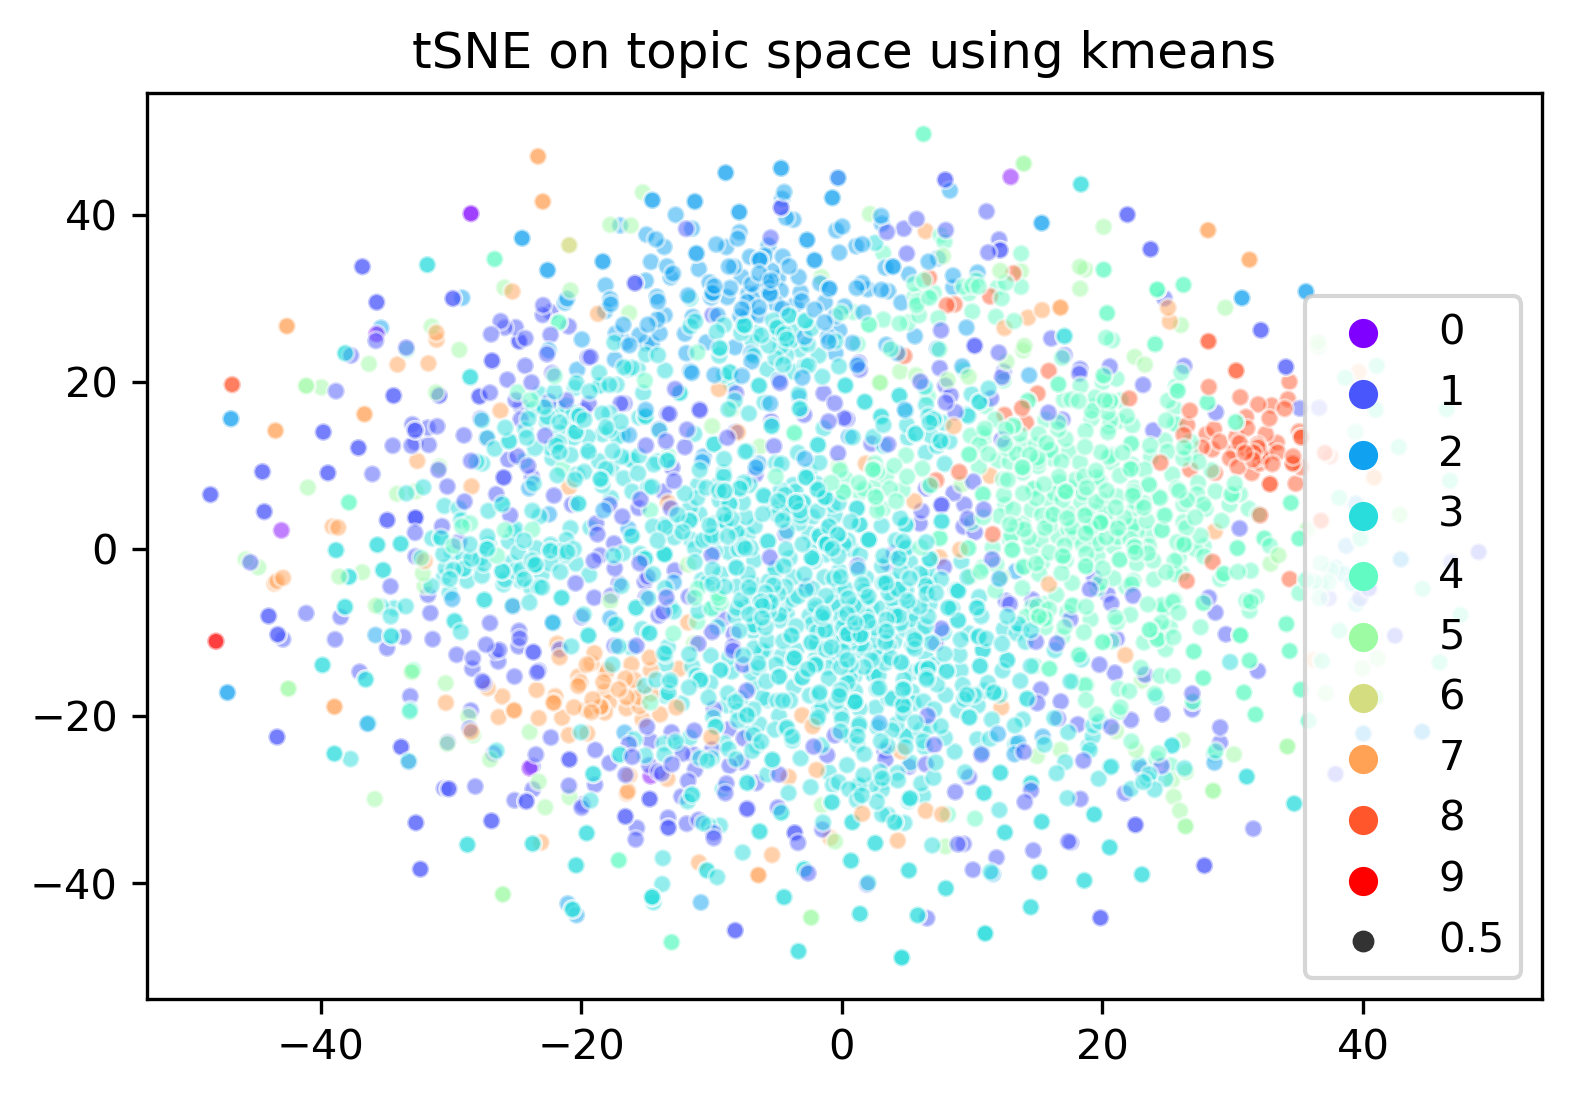

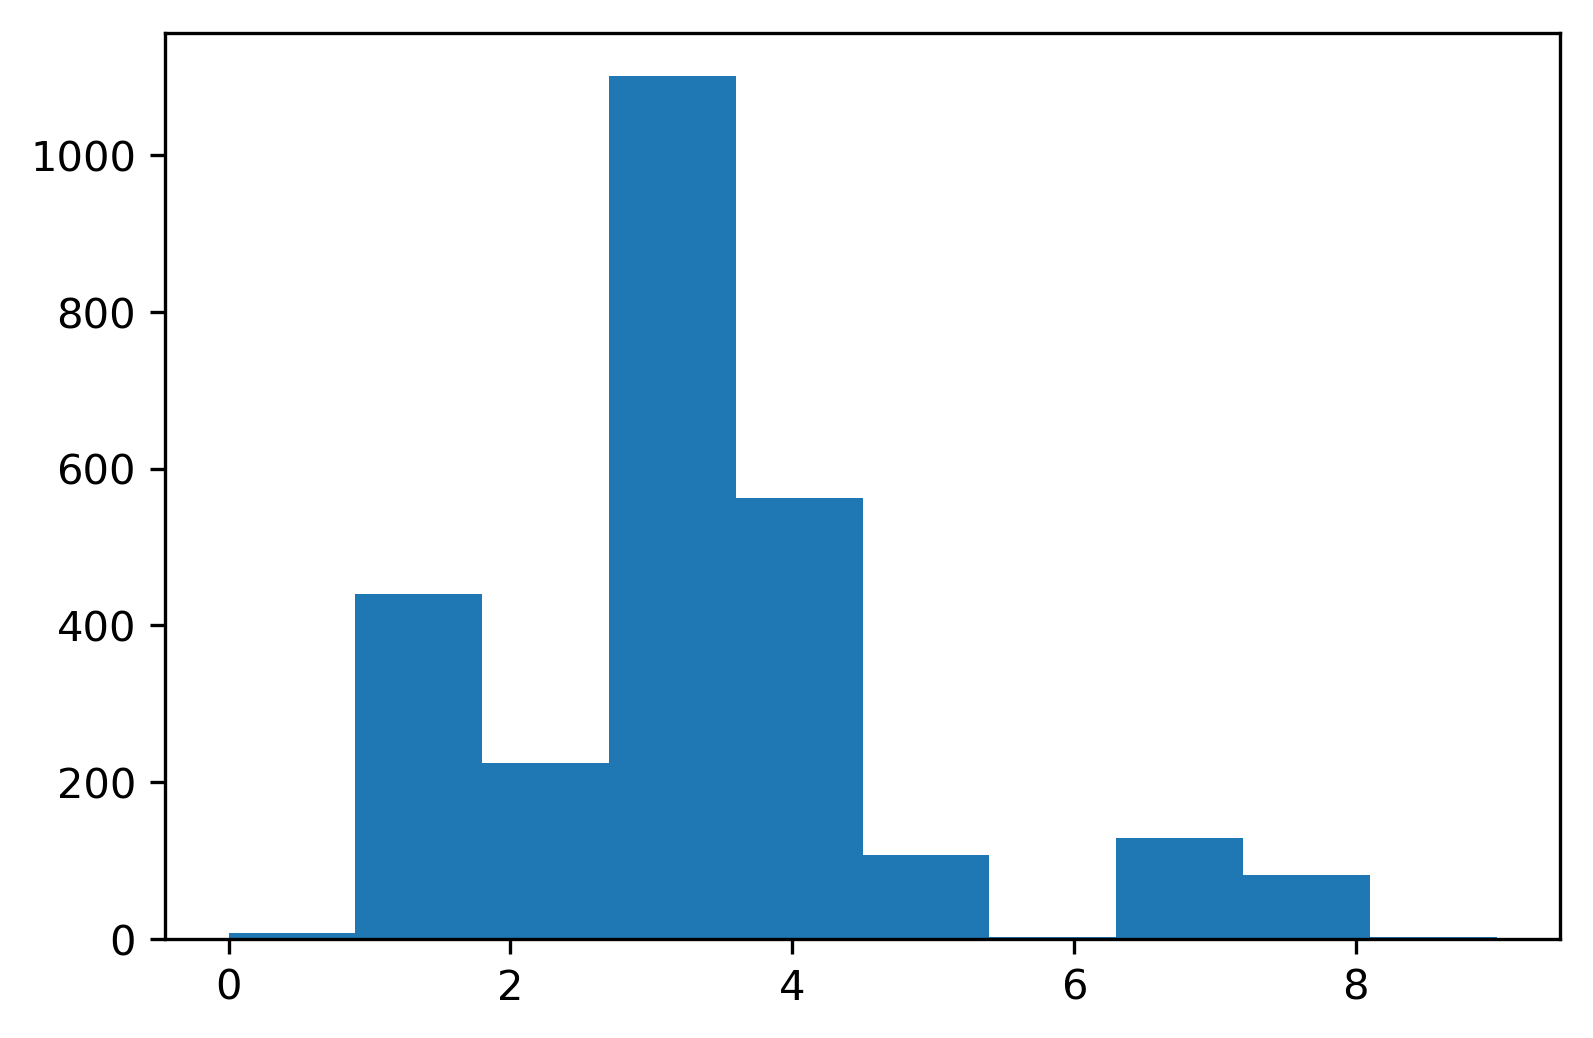

In [53]:
five.tsne(2, 50)

# Dim 100

In [56]:
(seven, eight)= clustering_algorithms.making_vectorizers(df.review, 100)

In [57]:
seven.fit(df['review'])

In [58]:
seven.kmeans(10)

## TSNE and Histogram

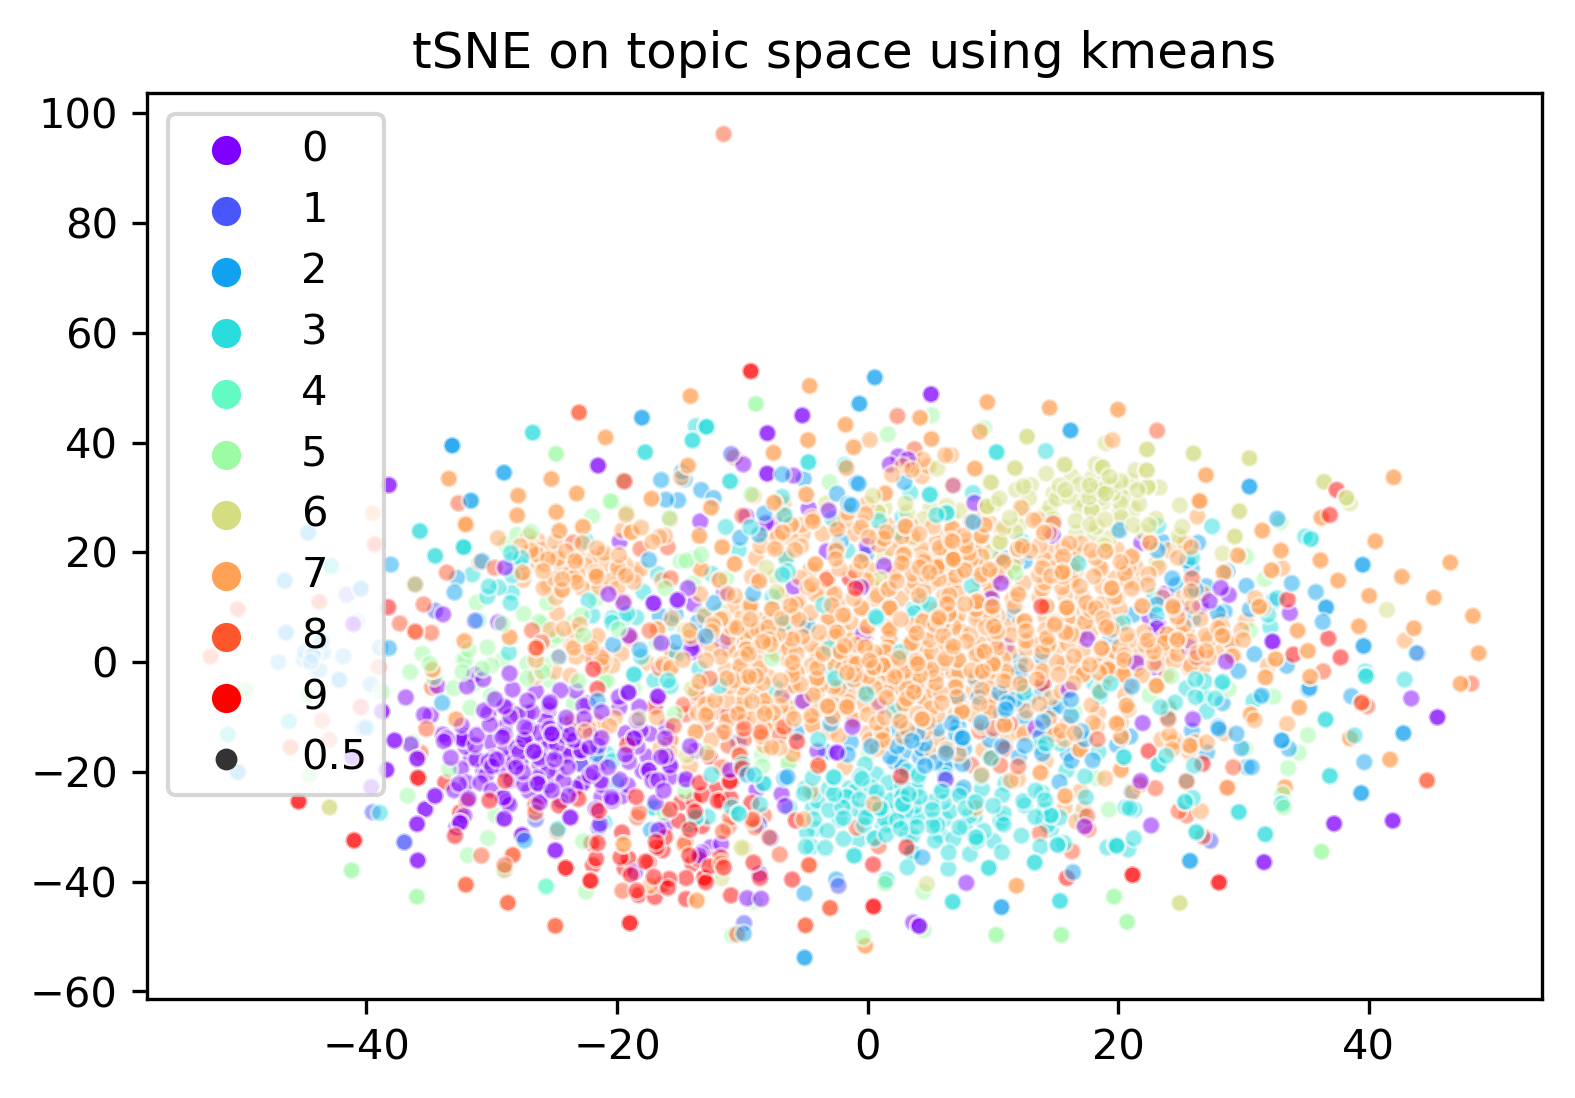

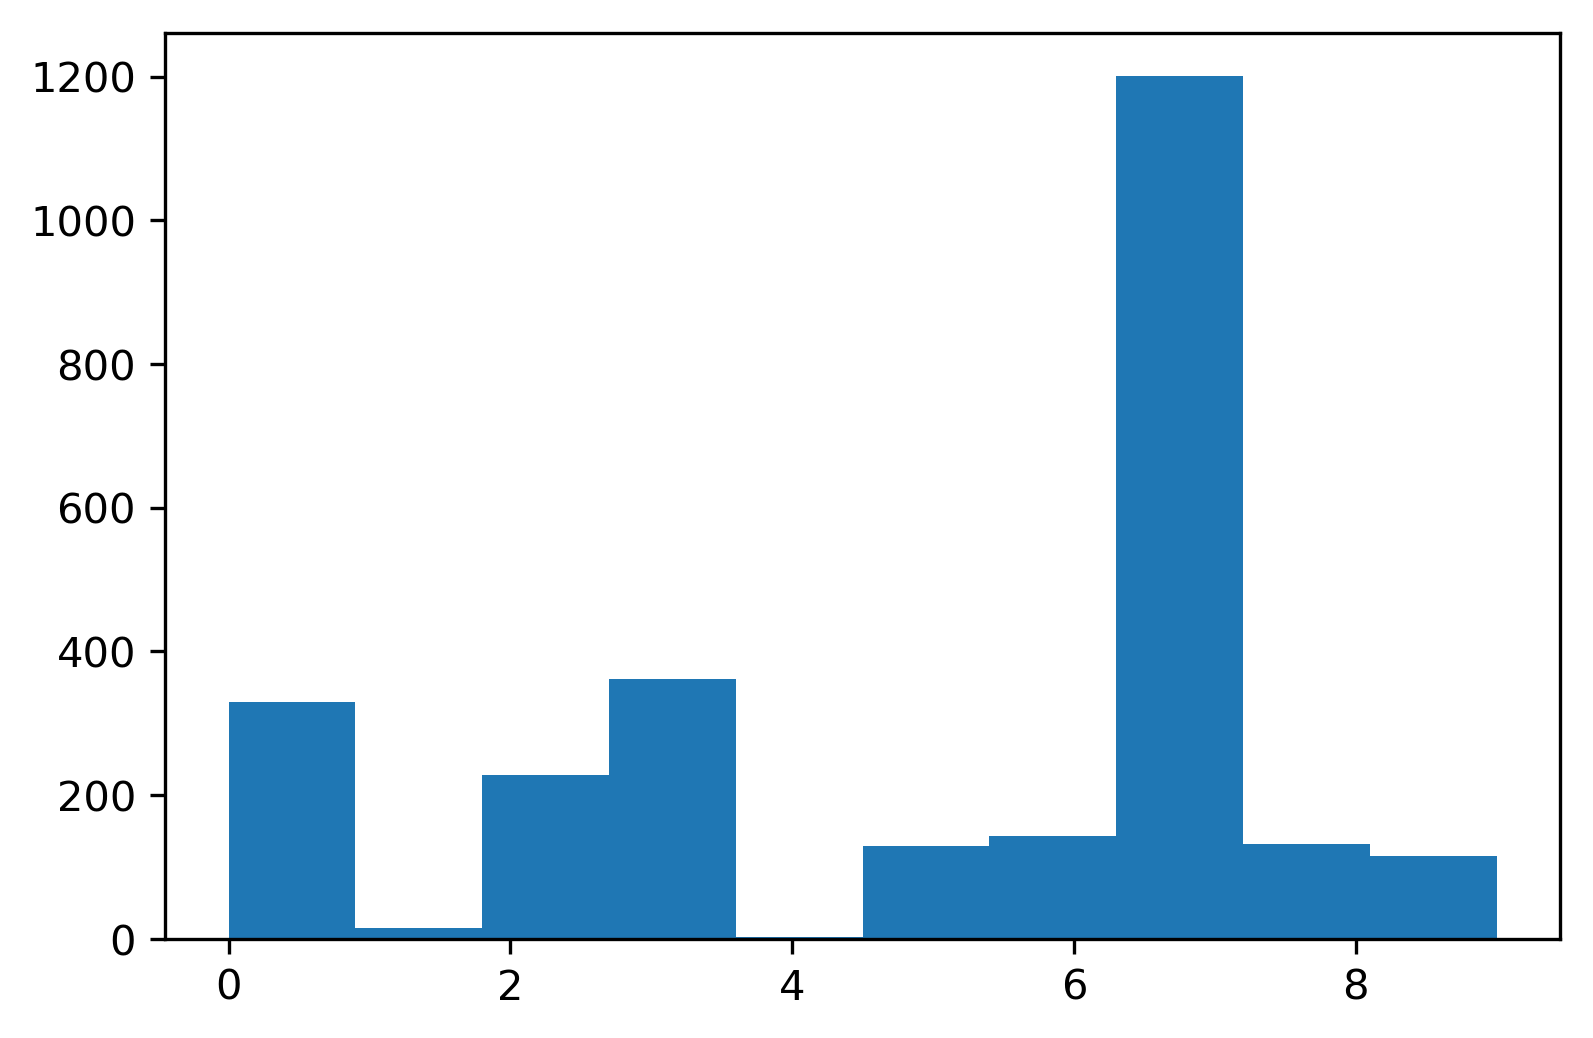

In [59]:
seven.tsne(2, 50)

# Best Dimensionality= 50; Number of Clusters

In [67]:
from sklearn.cluster import KMeans

In [70]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(three.topic_data)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(three.topic_data, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 


inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(three.topic_data)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 40759.558964
# clusters:  3   Inertia: 39777.588265
# clusters:  4   Inertia: 39068.551041
# clusters:  5   Inertia: 38301.293952
# clusters:  6   Inertia: 37650.992908
# clusters:  7   Inertia: 36984.022322
# clusters:  8   Inertia: 36483.851206
# clusters:  9   Inertia: 35916.673534
# clusters: 10   Inertia: 35437.583509
# clusters: 11   Inertia: 35099.727027
# clusters: 12   Inertia: 34909.679057
# clusters: 13   Inertia: 34356.120738
# clusters: 14   Inertia: 34001.222441
# clusters: 15   Inertia: 33779.206353
# clusters: 16   Inertia: 33672.208759
# clusters: 17   Inertia: 33141.471798
# clusters: 18   Inertia: 32937.933338
# clusters: 19   Inertia: 32903.465759
# clusters: 20   Inertia: 32511.769620
# clusters: 21   Inertia: 32182.195697
# clusters: 22   Inertia: 31916.805418
# clusters: 23   Inertia: 31595.283948
# clusters: 24   Inertia: 31561.510148


Text(0.5,1,'SSE By Cluster')

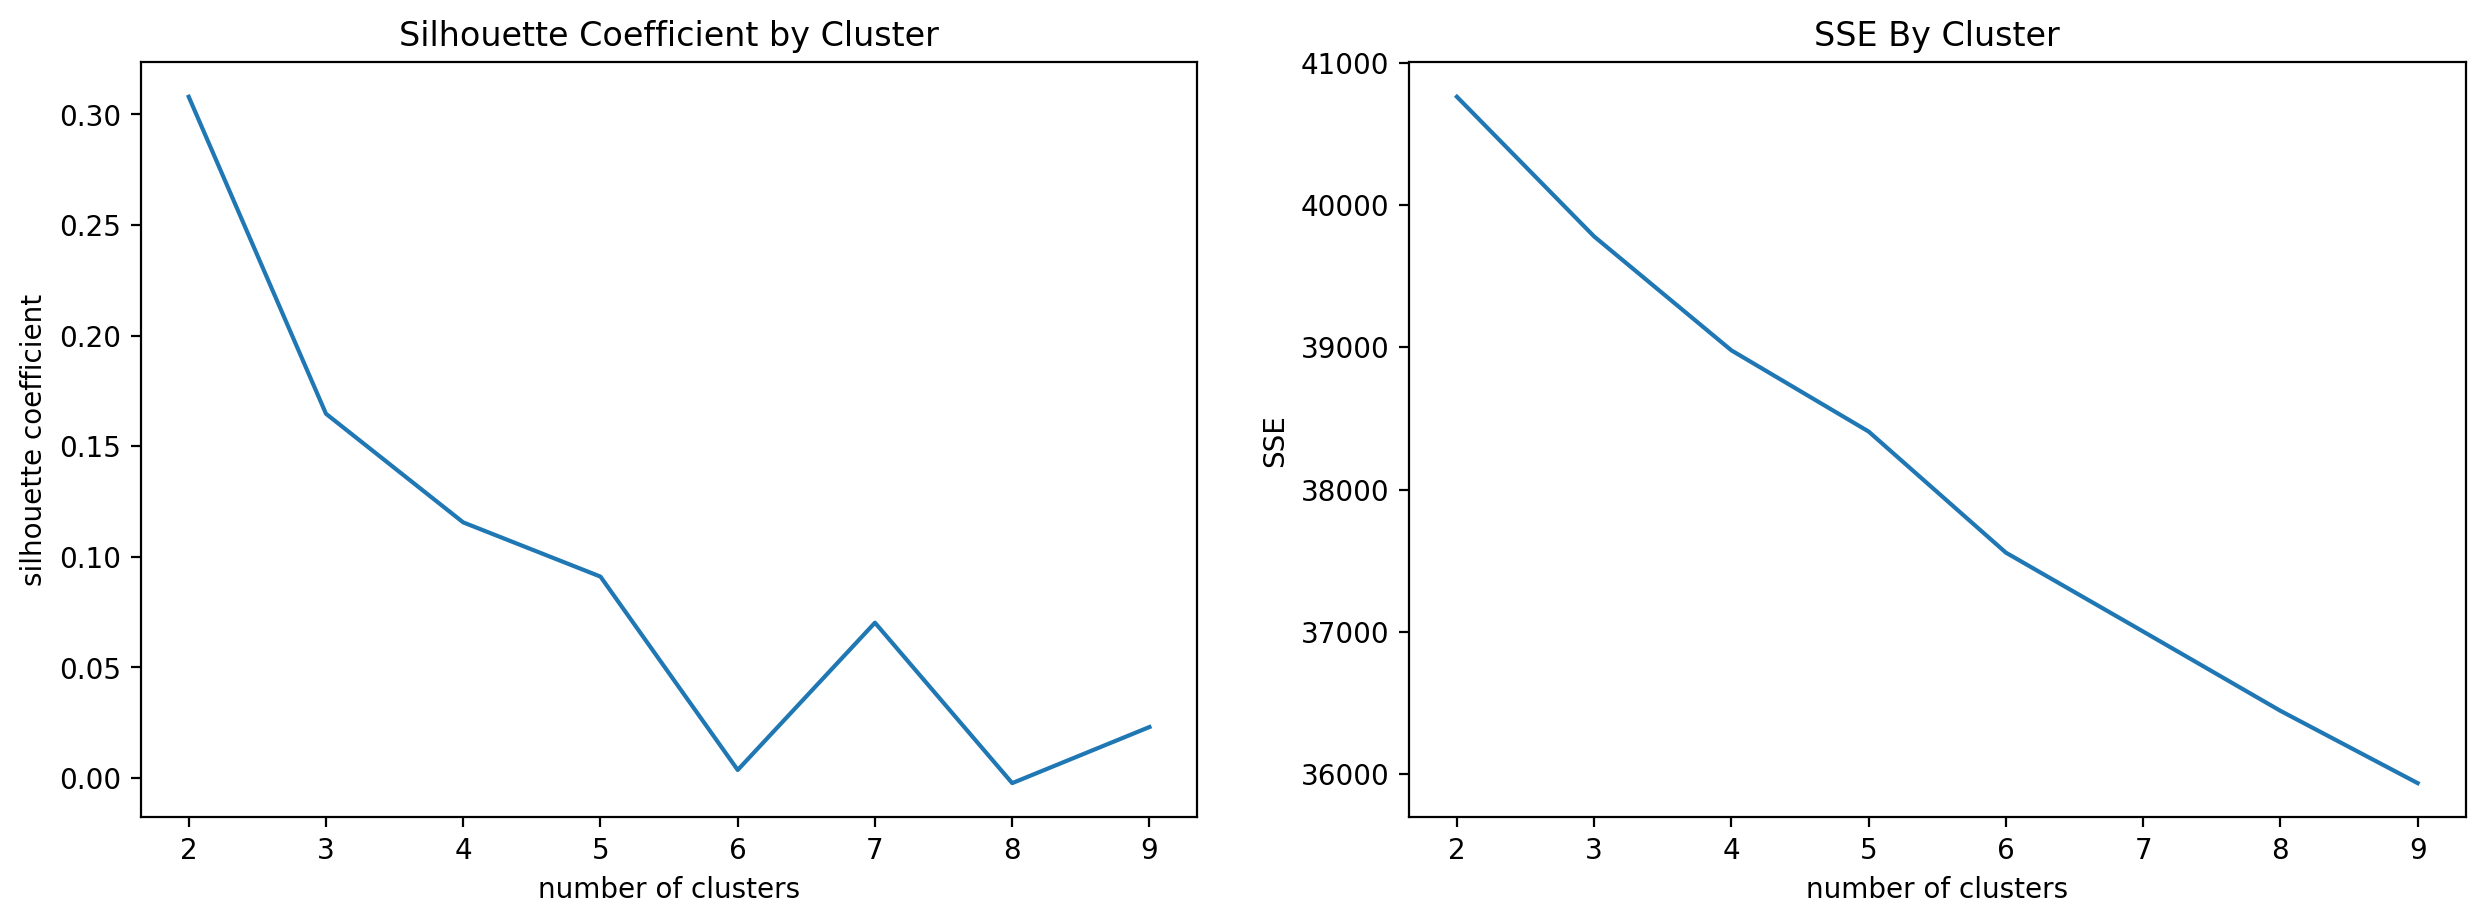

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
ax1.set_title('Silhouette Coefficient by Cluster')
# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE')
ax2.set_title('SSE By Cluster')

Text(0.5,1,'Inertia by Cluster')

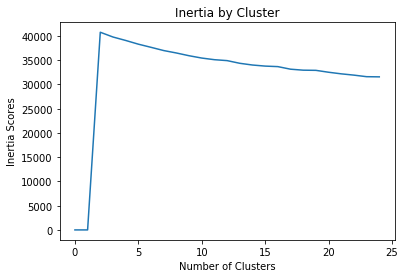

In [72]:
plt.plot(inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Scores')
plt.title("Inertia by Cluster")
# plt.xlim((2,25))
# plt.ylim((50000,400000))